PROJECT


CNN

1. Define my model of cnn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,f1_score, balanced_accuracy_score

from keras.engine import input_spec
from keras.models import Sequential
from keras import models
from keras import layers
from keras.layers import  Dropout

from keras.utils import np_utils
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from glob import glob

import librosa
import librosa.display
import soundfile
import IPython.display as ipd


from itertools import cycle
sns.set_theme(style = 'white', palette = None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

2. Read data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/603 project/Final Data.csv')
data = data.drop(['Unnamed: 0'], axis =1)
data = data.dropna()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,emotions
0,-434.546112,58.156612,9.894047,-8.546865,-8.173218,5.221165,-5.528871,3.341778,-23.978186,-2.720403,...,0.000675,0.000608,0.000522,0.000399,0.000284,0.000177,0.000037,0.000003,3.102119e-08,Fearful
1,-419.679962,65.107742,12.130507,-7.784642,-3.438557,4.441391,-19.543356,-2.626160,-16.569773,-1.438831,...,0.000583,0.000401,0.000331,0.000206,0.000236,0.000185,0.000034,0.000002,2.980383e-08,Fearful
2,-410.157288,54.048302,11.068645,-0.138936,-19.083153,-3.240092,-9.990661,8.005002,-18.877653,4.911428,...,0.000558,0.000479,0.000592,0.000463,0.000384,0.000319,0.000077,0.000004,5.117956e-08,Fearful
3,-445.549530,41.776089,8.507772,8.376337,5.491764,3.040438,-15.624712,0.337036,-14.916498,3.623014,...,0.000865,0.000596,0.000542,0.000607,0.000528,0.000358,0.000081,0.000006,8.470035e-08,Fearful
4,-408.631683,61.839359,9.616362,-9.109583,-24.612829,4.163121,-12.233807,5.569336,-25.207426,-4.318020,...,0.000803,0.000716,0.000398,0.000401,0.000406,0.000310,0.000069,0.000007,1.006750e-07,Fearful


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,emotions
0,-434.546112,58.156612,9.894047,-8.546865,-8.173218,5.221165,-5.528871,3.341778,-23.978186,-2.720403,...,6.752159e-04,6.080955e-04,5.221665e-04,3.986813e-04,2.837580e-04,1.770848e-04,3.743556e-05,2.546641e-06,3.102119e-08,Fearful
1,-419.679962,65.107742,12.130507,-7.784642,-3.438557,4.441391,-19.543356,-2.626160,-16.569773,-1.438831,...,5.827553e-04,4.007488e-04,3.308101e-04,2.059265e-04,2.362558e-04,1.847961e-04,3.398355e-05,1.940995e-06,2.980383e-08,Fearful
2,-410.157288,54.048302,11.068645,-0.138936,-19.083153,-3.240092,-9.990661,8.005002,-18.877653,4.911428,...,5.579009e-04,4.788236e-04,5.920292e-04,4.630405e-04,3.836140e-04,3.187080e-04,7.666331e-05,4.314858e-06,5.117956e-08,Fearful
3,-445.549530,41.776089,8.507772,8.376337,5.491764,3.040438,-15.624712,0.337036,-14.916498,3.623014,...,8.654224e-04,5.963728e-04,5.424964e-04,6.070535e-04,5.275332e-04,3.577251e-04,8.073443e-05,5.514461e-06,8.470035e-08,Fearful
4,-408.631683,61.839359,9.616362,-9.109583,-24.612829,4.163121,-12.233807,5.569336,-25.207426,-4.318020,...,8.031147e-04,7.157491e-04,3.984122e-04,4.009540e-04,4.057450e-04,3.103148e-04,6.873443e-05,6.701923e-06,1.006750e-07,Fearful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,-359.094299,104.029144,0.470273,34.949028,-17.029949,29.205788,-5.227501,4.055996,-10.090771,-0.644370,...,6.877782e-10,6.626182e-10,6.392047e-10,6.174182e-10,5.981283e-10,5.821847e-10,5.692519e-10,5.600695e-10,5.541173e-10,Angry
11678,-399.119171,135.589600,4.851437,52.624699,-6.847625,18.070534,-15.713984,2.576457,-7.296563,3.894440,...,4.628641e-09,4.309882e-09,4.052009e-09,3.837314e-09,3.661336e-09,3.522799e-09,3.414954e-09,3.339729e-09,3.292489e-09,Angry
11679,-347.012878,130.105194,-7.514110,41.805943,-13.432081,24.392363,-16.932913,1.249524,-8.332360,2.236149,...,1.656309e-10,1.534849e-10,1.439227e-10,1.361123e-10,1.297825e-10,1.248314e-10,1.210058e-10,1.183478e-10,1.166778e-10,Angry
11680,-261.230194,97.799316,-7.473067,40.631943,-18.329512,18.797359,-22.963507,5.596654,-10.013676,-6.652038,...,1.537054e-09,1.427326e-09,1.338531e-09,1.264672e-09,1.204225e-09,1.156645e-09,1.119740e-09,1.093959e-09,1.077797e-09,Angry


3. Get features

In [ ]:
X = data.drop(labels="emotions", axis=1)
Y = data["emotions"]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,-434.546112,58.156612,9.894047,-8.546865,-8.173218,5.221165,-5.528871,3.341778,-23.978186,-2.720403,...,0.001071,0.000675,0.000608,0.000522,0.000399,0.000284,0.000177,0.000037,0.000003,3.102119e-08
1,-419.679962,65.107742,12.130507,-7.784642,-3.438557,4.441391,-19.543356,-2.626160,-16.569773,-1.438831,...,0.000756,0.000583,0.000401,0.000331,0.000206,0.000236,0.000185,0.000034,0.000002,2.980383e-08
2,-410.157288,54.048302,11.068645,-0.138936,-19.083153,-3.240092,-9.990661,8.005002,-18.877653,4.911428,...,0.000693,0.000558,0.000479,0.000592,0.000463,0.000384,0.000319,0.000077,0.000004,5.117956e-08
3,-445.549530,41.776089,8.507772,8.376337,5.491764,3.040438,-15.624712,0.337036,-14.916498,3.623014,...,0.001927,0.000865,0.000596,0.000542,0.000607,0.000528,0.000358,0.000081,0.000006,8.470035e-08
4,-408.631683,61.839359,9.616362,-9.109583,-24.612829,4.163121,-12.233807,5.569336,-25.207426,-4.318020,...,0.000899,0.000803,0.000716,0.000398,0.000401,0.000406,0.000310,0.000069,0.000007,1.006750e-07


4. Process label

In [ ]:
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['Angry' 'Disgust' 'Fearful' 'Happy' 'Neutral' 'Pleasant_Surprise' 'Sad']


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

5.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9192, 168), (2298, 168), (9192, 7), (2298, 7))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((7353, 168), (2298, 168), (1839, 168), (7353, 7), (2298, 7), (1839, 7))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((7353, 168), (2298, 168), (1839, 168), (7353, 7), (2298, 7), (1839, 7))

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(7353, 168, 1)

In [ ]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(7, activation="softmax"))

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["acc", f1_m])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 512)          3072      
                                                                 
 batch_normalization (BatchN  (None, 168, 512)         2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 84, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 512)           1311232   
                                                                 
 dropout (Dropout)           (None, 84, 512)           0         
                                                                 
 batch_normalization_1 (Batc  (None, 84, 512)          2

In [ ]:
EPOCHS = 200
batch_size = 16

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/603 project/CNN_Model'
mdl_save_cnn = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, monitor='val_loss',save_best_only=True, mode='min') 

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=EPOCHS, batch_size=batch_size,
                    callbacks=[learning_rate_reduction,mdl_save_cnn])

72/72 [==============================] - 1s 7ms/step - loss: 1.1741 - acc: 0.5809 - f1_m: 0.5530
Accuracy of our model on test data :  58.09399485588074 %


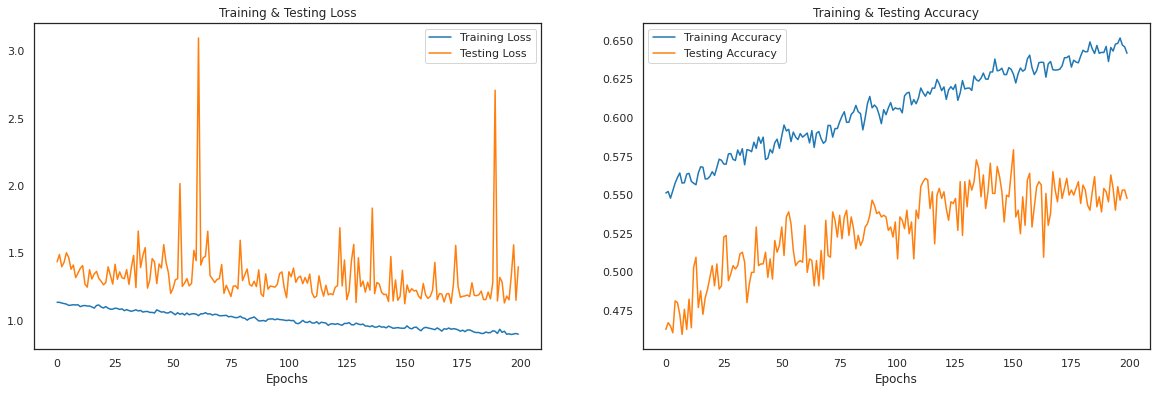

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
preds[12]

72/72 [==============================] - 1s 7ms/step


4

In [ ]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,Neutral,Sad
171,Angry,Angry
172,Disgust,Sad
173,Fearful,Happy
174,Happy,Neutral
175,Happy,Happy
176,Sad,Sad
177,Angry,Angry
178,Angry,Happy
179,Pleasant_Surprise,Pleasant_Surprise


In [ ]:
y_check = np.argmax(y_test, axis=1)
y_check

array([6, 1, 1, ..., 4, 1, 1])

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [98]:
report = classification_report(y_check, y_pred, output_dict=True)
re = pd.DataFrame(report)
#'Angry' 'Disgust' 'Fearful' 'Happy' 'Neutral' 'Pleasant_Surprise' 'Sad'
re = re.rename(columns={'0': 'Angry', '1': 'Disgust','2': 'Fearful','3': 'Happy','4': 'Neutral','5': 'Pleasant_Surprise','6': 'Sad',})
re

,Angry,Disgust,Fearful,Happy,Neutral,Pleasant_Surprise,Sad,accuracy,macro avg,weighted avg
precision,0.689840,0.498113,0.739336,0.637681,0.468132,0.851485,0.509740,0.58094,0.627761,0.608433
recall,0.706849,0.379310,0.410526,0.471850,0.651376,0.671875,0.832891,0.58094,0.589240,0.580940
f1-score,0.698241,0.430669,0.527919,0.542373,0.544757,0.751092,0.632427,0.58094,0.589640,0.574563
support,365.000000,348.000000,380.000000,373.000000,327.000000,128.000000,377.000000,0.58094,2298.000000,2298.000000


0.5809399477806788


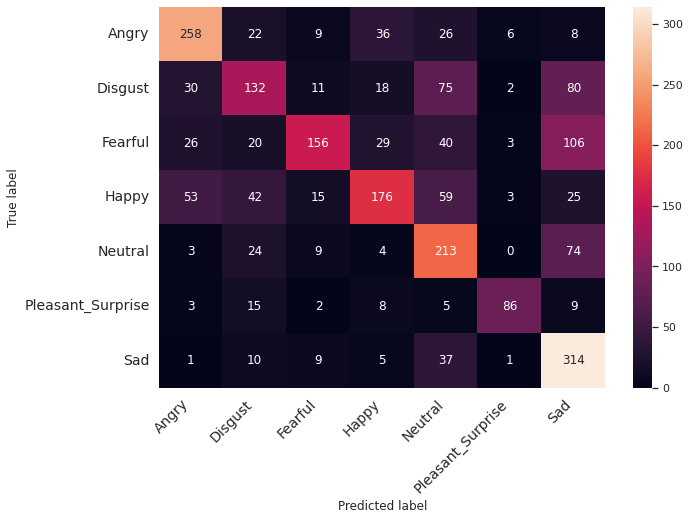

In [ ]:
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    #report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    # print(report)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=preds)
cm

In [ ]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

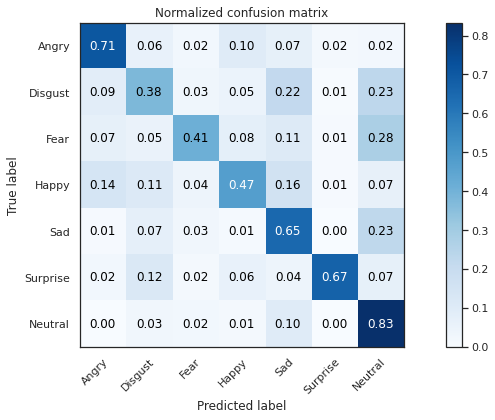

In [ ]:
plot_confusion_matrix(y_check, y_pred, emotion_labels ,normalize=True, title='Normalized confusion matrix') 
plt.show()